In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataframe = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])
dataframe.head()


,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_vir=dataframe.loc[dataframe['species']=='Iris-virginica']

In [4]:
iris_vir.mean(numeric_only=True)

slength    6.588
swidth     2.974
plength    5.552
pwidth     2.026
dtype: float64

In [5]:
var=iris_vir.var(numeric_only=True)
var**0.5

slength    0.635880
swidth     0.322497
plength    0.551895
pwidth     0.274650
dtype: float64

In [6]:
iris_set=dataframe.loc[dataframe['species']=='Iris-setosa']

In [7]:
iris_set.mean(numeric_only=True)

slength    5.006
swidth     3.418
plength    1.464
pwidth     0.244
dtype: float64

In [8]:
var_1=iris_set.var(numeric_only=True)
var_1**0.5

slength    0.352490
swidth     0.381024
plength    0.173511
pwidth     0.107210
dtype: float64

Iris virginica swidth sd= 0.322497

Iris setosa swidth sd= 0.381024

The two values are comparable

In [12]:
import statsmodels.api as sm

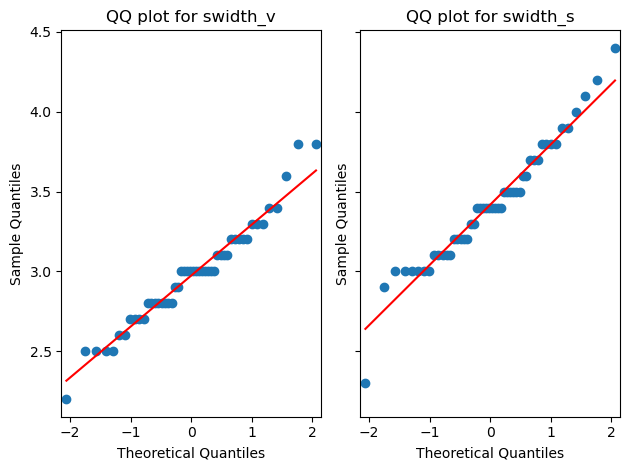

In [15]:
swidth_v=iris_vir['swidth']
swidth_s=iris_set['swidth']

fig, axs=plt.subplots(1,2, sharey=True, tight_layout=True)
axs[0].set_title('QQ plot for swidth_v')
sm.qqplot(swidth_v, line='s', ax=axs[0])

axs[1].set_title('QQ plot for swidth_s')
sm.qqplot(swidth_s, line='s', ax=axs[1])

plt.show()

### Normality was confirmed, variance was compared and is similar, we can apply an unpaired t-test

In [20]:
from scipy import stats
stats.ttest_ind(iris_set['swidth'],iris_vir['swidth'], equal_var = True, alternative='two-sided') 

TtestResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09, df=98.0)

We should be able to separate the two species from the sepal lenght. 

the two means are not comparable, null hypothesis failed, running hypothesis holds